<div style="text-align: center">
    <img src='../UDC.png' width='40%'>
    <img src='../ICI.png' width='20%'>
</div>
<div style="text-align: center">
    <p style="text-align: center">Universidad de Colima<br>
    Facultad de Ingeniería Mecánica y Eléctrica<br>
    Ingeniería en Computación Inteligente</p>
    <p style="text-align: center">Red Neuronal aplicada a imágenes de números<br>
    Aprendizaje Profundo</p>
    <p style="text-align: center">
    Larios Bravo Cristian Armando 20188165<br>
    </p>
    <p style="text-align: center">8°D</p>
</div>
<div style="text-align: right">
    Lugar: Mexico, Colima, Coquimatlan.<br>
    Fecha: 07/03/2025.
</div>

In [1]:
# Desarrollar una red neuronal que clasifique dos tipos de imagenes de numeros
# Red neuronal MLP

"""
Dataset: MNIST
* 75 % para entrenamiento
* 15 % para validación
* 10 % para prueba
"""

# Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import keras

# Dataset: MNIST
from keras.datasets import mnist

# seed 0
np.random.seed(0)

In [2]:
# Importar el dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizar los datos
X_train = X_train / 255

# Redimensionar los datos
X_train = X_train.reshape(X_train.shape[0], -1)

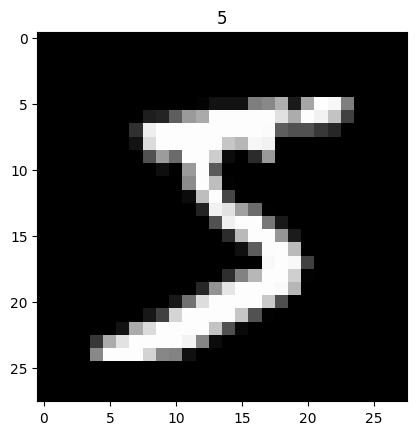

In [3]:
# Imprimir el primer dato y su etiqueta
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title(y_train[0])
plt.show()

In [4]:
# Rescatar solo los datos de los números 0 y 1
X_train = X_train[(y_train == 0) | (y_train == 1)]
y_train = y_train[(y_train == 0) | (y_train == 1)]

In [96]:
# y_train = keras.utils.to_categorical(y_train, 2)

In [15]:
# Dividir el dataset
# 75 % para entrenamiento
# 15 % para validación
# 10 % para prueba
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.4, random_state=0) # 0.4 * 0.25 = 0.1

# 70 % para entrenamiento
# 20 % para validación
# 10 % para prueba
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)
# X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.33, random_state=0) # 0.33 * 0.3 = 0.1

# Normalizar los datos
escalador = StandardScaler()
X_train = escalador.fit_transform(X_train)
X_val = escalador.transform(X_val)
X_test = escalador.transform(X_test)

In [21]:
# Inicializar la red neuronal
modelo = Sequential()

In [ ]:
# Añadir capas
modelo.add(Dense(units=128, activation='sigmoid', input_shape=(X_train.shape[1],))) # Capa de entrada
modelo.add(Dense(units=64, activation='sigmoid')) # Capa oculta
modelo.add(Dense(units=2, activation='softmax')) # Capa de salida

# Compilar el modelo
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Entrenar el modelo
modelo.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9655 - loss: 0.0875 - val_accuracy: 0.9980 - val_loss: 0.0094
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 0.0036 - val_accuracy: 0.9990 - val_loss: 0.0054
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9991 - loss: 0.0022 - val_accuracy: 0.9990 - val_loss: 0.0045
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9990 - val_loss: 0.0043
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.7805e-04 - val_accuracy: 0.9980 - val_loss: 0.0042
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.9169e-04 - val_accuracy: 0.9990 - val_loss: 0.0039
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.8620e-04 - val_accuracy: 0.9990 - val_loss: 0.0039
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.9554e-04 - 

In [14]:
# Evaluar el modelo
test_loss, test_acc = modelo.evaluate(X_test, y_test)
print(f"Pérdida en el conjunto de prueba: {test_loss}")
print(f"Exactitud en el conjunto de prueba: {test_acc}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9974 - loss: 0.0083     
Pérdida en el conjunto de prueba: 0.0041212048381567
Exactitud en el conjunto de prueba: 0.9989373087882996


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


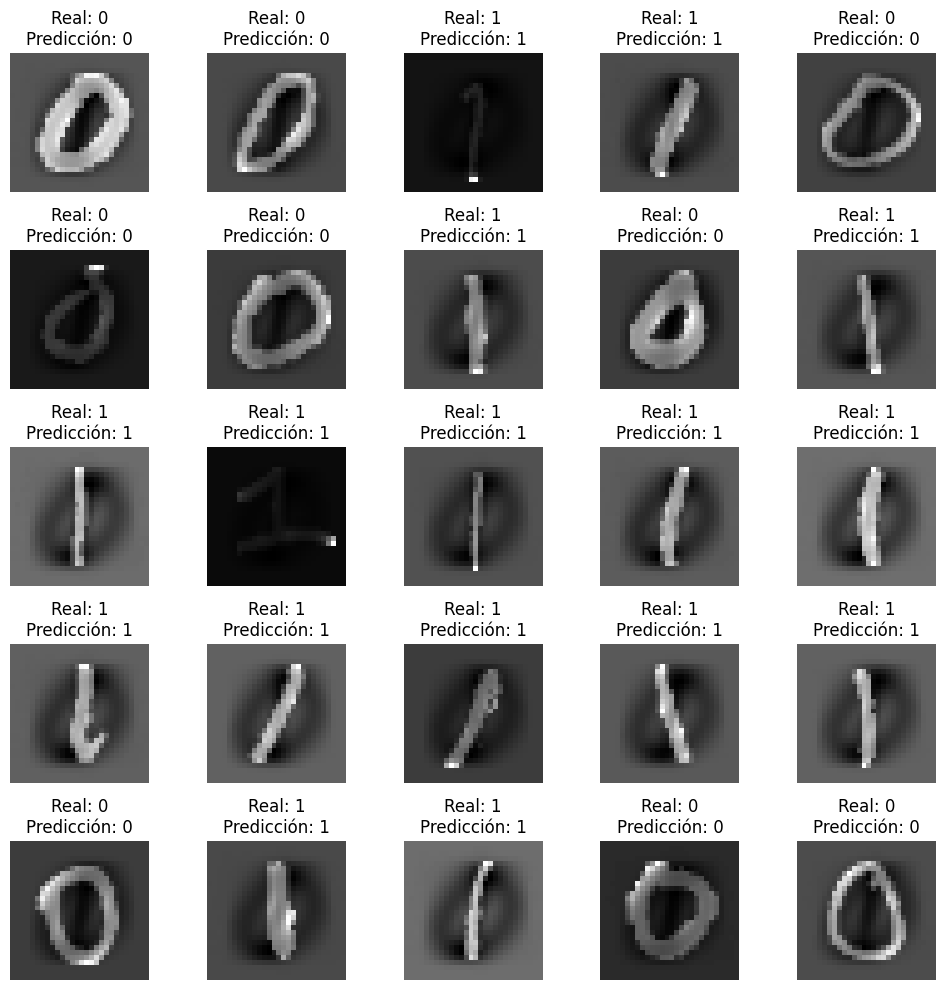

In [133]:
# Predicciones
y_pred = modelo.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Visualizar las predicciones
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"Real: {y_test[i]}\nPredicción: {y_pred[i]}")
plt.tight_layout()
plt.show()

In [134]:
# Guardar el modelo
modelo.save('modelo_mnist.h5')
modelo.save('modelo_mnist.keras')
# modelo.save_weights('pesos_mnist.h5')

In [104]:
# Cargar el modelo
from keras.models import load_model
modelo2 = load_model('modelo_mnist.h5')

In [105]:
# Evaluar el modelo
test_loss, test_acc = modelo2.evaluate(X_test, y_test)
print(f"Pérdida en el conjunto de prueba: {test_loss}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9980 - loss: 0.1381      
Pérdida en el conjunto de prueba: 0.06066130846738815


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


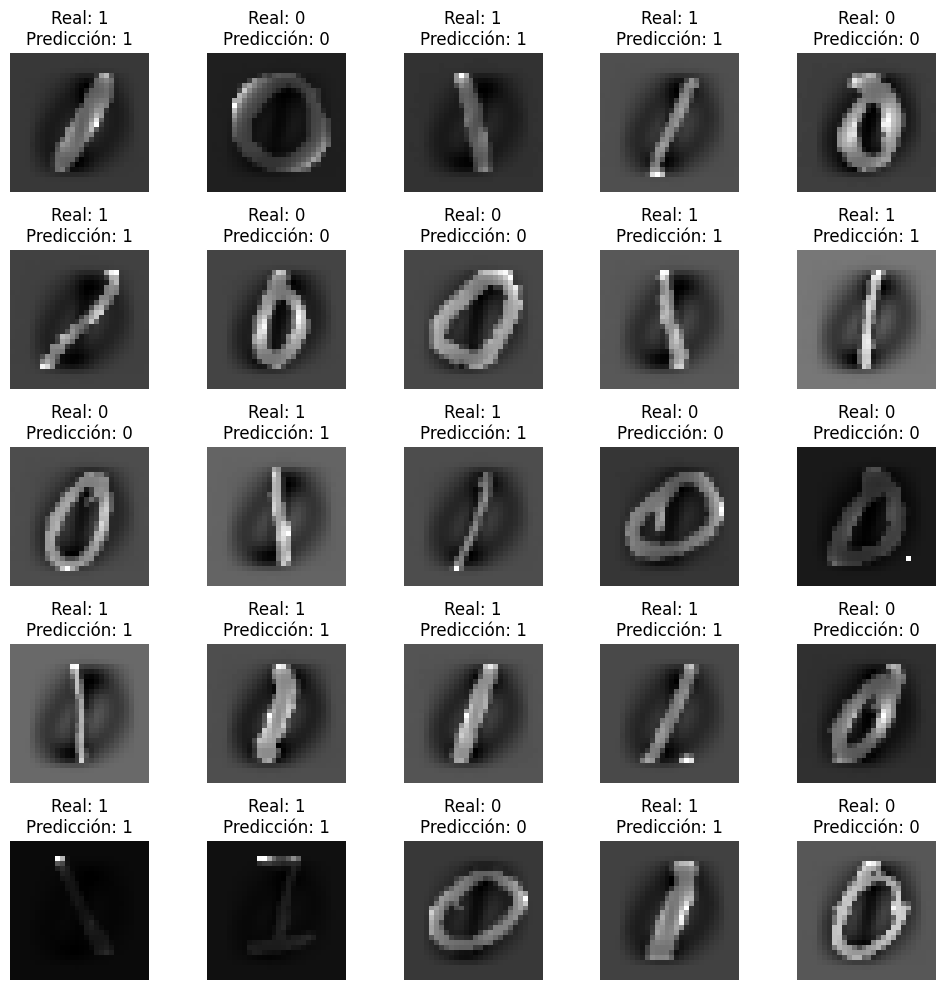

In [106]:
# Predicciones
y_pred = modelo2.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Visualizar las predicciones
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"Real: {y_test[i]}\nPredicción: {y_pred[i]}")
plt.tight_layout()
plt.show()